# Guided Project:
# Predicting Car Prices

## Introduction to the data set

In this course, we explored the fundamentals of machine learning using the k-nearest neighbors algorithm. In this guided project, you'll practice the machine learning workflow you've learned so far to predict a car's market price using its attributes. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile) and can download it directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data). 

In [103]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

from matplotlib import pyplot as plt
%matplotlib inline

In [104]:
headers=['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
        'num_doors', 'body_styles', 'drive_wheels', 'engine_location',
        'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
        'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
        'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg',
        'price']

cars = pd.read_csv('data/imports-85.data', sep=',', names=headers)

In [105]:
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_styles,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Data Cleaning

As we learned in this course, we usually can't have any missing values if we want to use them for predictive modeling. Based on the data set preview from the last step, we can tell that the `normalized-losses` column contains missing values represented using `"?"`. Let's replace these values and look for the presence of missing values in other numeric columns. Let's also normalize the values in all numeric columns.

In [106]:
cars = cars.replace("?", np.nan)

In [107]:
print(len(cars.columns))
cars.columns

26


Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_doors', 'body_styles', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [108]:
cars[cars.columns[:13]].head(10)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_styles,drive_wheels,engine_location,wheel_base,length,width,height
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0


In [109]:
cars[cars.columns[13:]].head(10)

,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


In [110]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    164 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            203 non-null object
body_styles          205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression_ratio    205 non-null float64
horsepower           203 non-nul

In [111]:
features_to_cast_numeric = ['normalized_losses', 'bore', 'stroke',
                            'horsepower', 'peak_rpm', 'price']

cars[features_to_cast_numeric] = cars[features_to_cast_numeric].astype('float')

In [112]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    164 non-null float64
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            203 non-null object
body_styles          205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horsepower           203 non-

In [113]:
# num of null rows in 'normalized_losses' column

cars['normalized_losses'].isnull().sum()

41

In [116]:
numeric_features = []

for col in cars.columns:
    
    if cars[col].dtype != 'object':
        numeric_features.append(col)
    
numeric_features

['symboling',
 'normalized_losses',
 'wheel_base',
 'length',
 'width',
 'height',
 'curb_weight',
 'engine_size',
 'bore',
 'stroke',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'city_mpg',
 'highway_mpg',
 'price']

In [123]:
cars['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [124]:
numeric_features.remove('symboling')

In [125]:
numeric_features_withnull = []

# total samples
print(cars.shape[0])

for numcol in numeric_features:

    if cars[numcol].isnull().sum() > 0:
        print(numcol, ':', cars[numcol].isnull().sum())
        numeric_features_withnull.append(numcol)


205
normalized_losses : 41
bore : 4
stroke : 4
horsepower : 2
peak_rpm : 2
price : 4


In [126]:
numeric_features_withnull

['normalized_losses', 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price']

In [127]:
# Null handling -> replace with average
# exception --- rows with 'price' null value -> drop.

for numcol in numeric_features_withnull:
    if numcol != 'price':
       
        cars[numcol][cars[numcol].isnull()] = cars[numcol].mean()


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [128]:
# total samples
print(cars.shape[0])

for numcol in numeric_features:

    if cars[numcol].isnull().sum() > 0:
        numeric_features_withnull.append(numcol)
        print(numcol, ':', cars[numcol].isnull().sum())

205
price : 4


In [129]:
cars = cars.dropna(axis=0, how='any', subset=['price'])

In [130]:
# total samples
print(cars.shape[0])

for numcol in numeric_features:

    if cars[numcol].isnull().sum() > 0:
        numeric_features_withnull.append(numcol)
        print(numcol, ':', cars[numcol].isnull().sum())

201


In [131]:
# normalize

def normalize_num_cols(df, cols):
    
    df_ = df.copy()
    
    for col in cols:
        
        if col != 'price':
        
            mean = np.mean(df_[col])
            std = np.std(df_[col])

            df_[col] = df_[col].apply(lambda x: (x - mean)/std)
        
    return df_


cars = normalize_num_cols(cars, numeric_features)

In [132]:
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_styles,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,0.000000,alfa-romero,gas,std,two,convertible,rwd,front,-1.685107,...,0.075389,mpfi,0.520966,-1.829833,-0.291435,0.203754,-0.246718,-0.652249,-0.542288,13495.0
1,3,0.000000,alfa-romero,gas,std,two,convertible,rwd,front,-1.685107,...,0.075389,mpfi,0.520966,-1.829833,-0.291435,0.203754,-0.246718,-0.652249,-0.542288,16500.0
2,1,0.000000,alfa-romero,gas,std,two,hatchback,rwd,front,-0.710103,...,0.606234,mpfi,-2.433363,0.676031,-0.291435,1.357416,-0.246718,-0.964397,-0.689386,16500.0
3,2,1.315931,audi,gas,std,four,sedan,fwd,front,0.165748,...,-0.431327,mpfi,-0.526138,0.453993,-0.041121,-0.037710,0.801670,-0.184027,-0.100993,13950.0
4,2,1.315931,audi,gas,std,four,sedan,4wd,front,0.099646,...,0.220165,mpfi,-0.526138,0.453993,-0.541748,0.311072,0.801670,-1.120471,-1.277779,17450.0


## Univariate Model

Let's start with some univariate k-nearest neighbors models. Starting with simple models before moving to more complex models helps us structure your code workflow and understand the features better.

In [133]:
def knn_train_test(train_col, target_col, df):
    
    np.random.seed(0)
    df = df.reindex(np.random.permutation(df.index))
    
    train_set = df.iloc[:180]
    test_set = df.iloc[180:]
    
    knn = KNeighborsRegressor()
    knn.fit(train_set[train_col], train_set[target_col])
    
    rmse = np.sqrt(mean_squared_error(test_set['price'],
                                      knn.predict(test_set[train_col])))
    
    return rmse
    

In [143]:
num_features_ordered = []
rmse_ordered = []

for numf in numeric_features:
    if numf != 'price':
        
        numf_rmse = knn_train_test([numf], ['price'], cars)
        
        print(numf, ':', numf_rmse)
        
        num_features_ordered.append(numf)
        rmse_ordered.append(numf_rmse)
    

normalized_losses : 6828.23496416
wheel_base : 5893.30931901
length : 3248.94321661
width : 3868.06816309
height : 6874.07829693
curb_weight : 2834.15390986
engine_size : 3551.20556914
bore : 5270.30864769
stroke : 6494.56294171
compression_ratio : 5566.49842181
horsepower : 2604.27369054
peak_rpm : 7801.77218341
city_mpg : 3880.19314271
highway_mpg : 5072.51505384


In [144]:
univariate_model_test = pd.Series(data=rmse_ordered, index=num_features_ordered)
univariate_model_test = univariate_model_test.sort_values()
univariate_model_test

horsepower           2604.273691
curb_weight          2834.153910
length               3248.943217
engine_size          3551.205569
width                3868.068163
city_mpg             3880.193143
highway_mpg          5072.515054
bore                 5270.308648
compression_ratio    5566.498422
wheel_base           5893.309319
stroke               6494.562942
normalized_losses    6828.234964
height               6874.078297
peak_rpm             7801.772183
dtype: float64

In [135]:
def knn_train_test(train_col, target_col, df):
    
    np.random.seed(0)
    df = df.reindex(np.random.permutation(df.index))
    
    train_set = df.iloc[:180]
    test_set = df.iloc[180:]
    
    k_vals = [1,3,5,7,9]
    k_rmses = {}
        
    for k in k_vals:
        
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_set[train_col], train_set[target_col])

        rmse = np.sqrt(mean_squared_error(test_set['price'],
                                          knn.predict(test_set[train_col])))
        
        k_rmses[k] = rmse
    
    plt.title(str(train_col))
    plt.scatter(list(k_rmses.keys()), list(k_rmses.values()))
    plt.show()
    
    return k_rmses


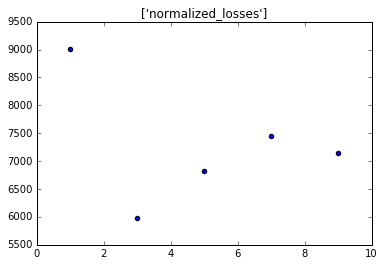

normalized_losses 
 {1: 9013.4844934845096, 3: 5983.7238529320648, 9: 7145.7958522985946, 5: 6828.2349641553992, 7: 7456.7934197586737}


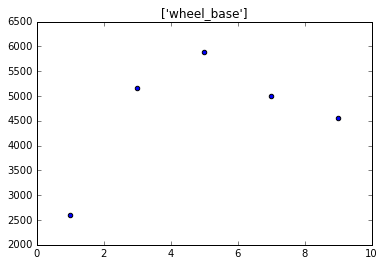

wheel_base 
 {1: 2597.7823876016505, 3: 5160.6387145196431, 9: 4563.9427072089193, 5: 5893.309319009466, 7: 4990.9096776145834}


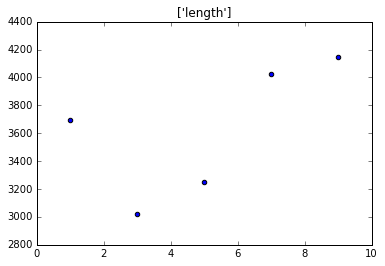

length 
 {1: 3698.1391459566721, 3: 3022.6499630195026, 9: 4148.7102798916367, 5: 3248.9432166108877, 7: 4025.3262138961964}


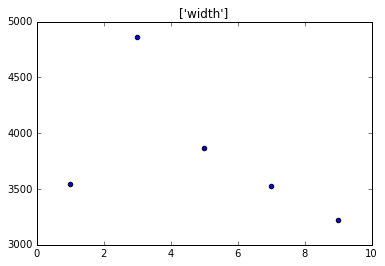

width 
 {1: 3543.9470126641891, 3: 4857.5618266236097, 9: 3219.6632088959868, 5: 3868.068163086803, 7: 3526.7838632217649}


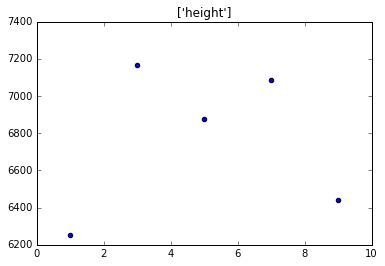

height 
 {1: 6251.4538842309848, 3: 7169.2584361152394, 9: 6442.4622530391453, 5: 6874.078296934139, 7: 7085.5041420177049}


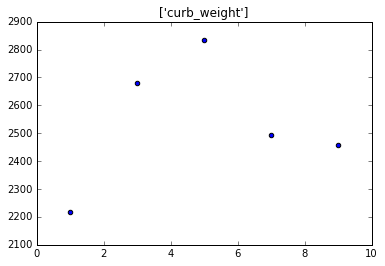

curb_weight 
 {1: 2217.536997060778, 3: 2678.7664607656179, 9: 2457.1945429192033, 5: 2834.1539098577382, 7: 2493.9515327715199}


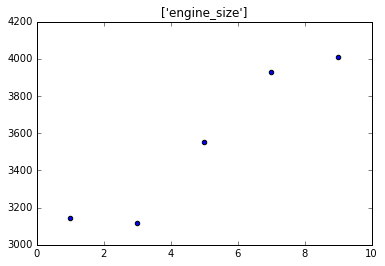

engine_size 
 {1: 3145.7219929839407, 3: 3115.1145672664697, 9: 4008.4762250359458, 5: 3551.2055691392629, 7: 3931.6908691273034}


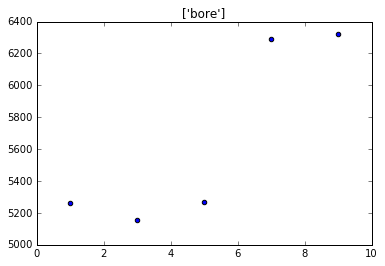

bore 
 {1: 5260.5226655044189, 3: 5154.8670467667025, 9: 6321.0346284182433, 5: 5270.3086476889339, 7: 6293.3357940689621}


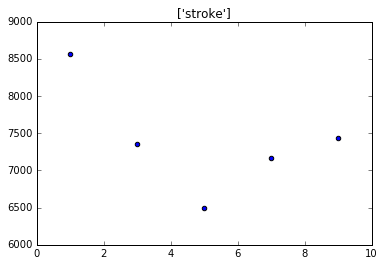

stroke 
 {1: 8566.4130683234544, 3: 7357.2019587187951, 9: 7435.3890850427561, 5: 6494.5629417082046, 7: 7167.5526501188306}


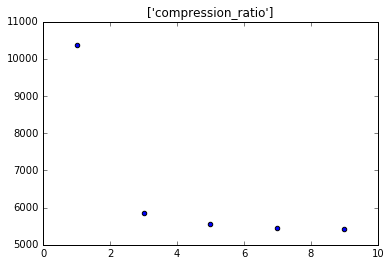

compression_ratio 
 {1: 10381.77075454857, 3: 5849.3689452966682, 9: 5414.676511019733, 5: 5566.4984218088121, 7: 5456.7682034729523}


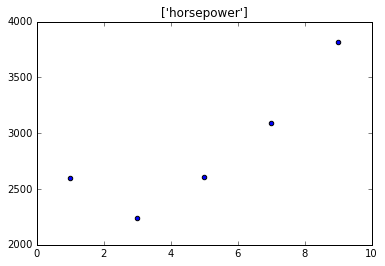

horsepower 
 {1: 2598.7011224474286, 3: 2236.1725792596608, 9: 3813.9847313360074, 5: 2604.2736905398588, 7: 3093.1154789912262}


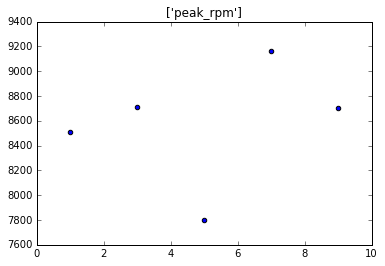

peak_rpm 
 {1: 8507.137291989704, 3: 8710.0028547732836, 9: 8703.7732730868174, 5: 7801.7721834147897, 7: 9161.0510524087604}


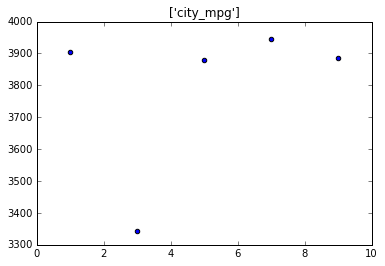

city_mpg 
 {1: 3903.8818593072933, 3: 3344.339039102586, 9: 3884.7880360766112, 5: 3880.1931427136333, 7: 3945.567100113316}


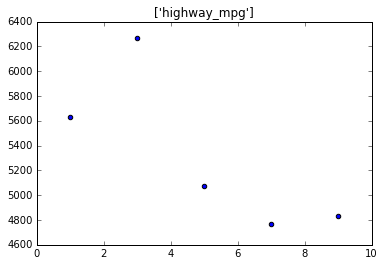

highway_mpg 
 {1: 5630.2587143466317, 3: 6271.7600822337372, 9: 4834.3107445708838, 5: 5072.5150538395219, 7: 4769.4695250151863}


In [136]:
for numf in numeric_features:
    if numf != 'price':
        print(numf, '\n', knn_train_test([numf], ['price'], cars))

## Multivariate Model

Let's modify the `knn_train_test()` function we wrote in the last step to work with multiple columns.

In [137]:
def knn_train_test(train_col, target_col, df):
    
    np.random.seed(0)
    df = df.reindex(np.random.permutation(df.index))
    
    train_set = df.iloc[:180]
    test_set = df.iloc[180:]

    knn = KNeighborsRegressor()
    knn.fit(train_set[train_col], train_set[target_col])

    rmse = np.sqrt(mean_squared_error(test_set['price'],
                                      knn.predict(test_set[train_col])))

    return rmse


### Test result from 'Univariate Model' test

[**rmse for each column** (univariate model)]

In [146]:
univariate_model_test

horsepower           2604.273691
curb_weight          2834.153910
length               3248.943217
engine_size          3551.205569
width                3868.068163
city_mpg             3880.193143
highway_mpg          5072.515054
bore                 5270.308648
compression_ratio    5566.498422
wheel_base           5893.309319
stroke               6494.562942
normalized_losses    6828.234964
height               6874.078297
peak_rpm             7801.772183
dtype: float64

In [145]:
# use the best 2 features from the previous step.

best_two_rmse = knn_train_test(univariate_model_test.index[:2], ['price'], cars)
best_two_rmse

1906.4060507867125

In [147]:
# use the best 3 features from the previous step.

best_three_rmse = knn_train_test(univariate_model_test.index[:3], ['price'], cars)
best_three_rmse

2857.0399420512463

In [148]:
# use the best 4 features from the previous step.

best_four_rmse = knn_train_test(univariate_model_test.index[:4], ['price'], cars)
best_four_rmse

2914.4957309480287

In [149]:
# use the best 5features from the previous step.

best_five_rmse = knn_train_test(univariate_model_test.index[:5], ['price'], cars)
best_five_rmse

2138.8205766374181

## Hyperparameter Tuning

In [150]:
def knn_train_test(train_col, target_col, df):
    
    np.random.seed(0)
    df = df.reindex(np.random.permutation(df.index))
    
    train_set = df.iloc[:180]
    test_set = df.iloc[180:]
    
    k_vals = range(1,26)
    k_rmses = {}
        
    for k in k_vals:
        
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_set[train_col], train_set[target_col])

        rmse = np.sqrt(mean_squared_error(test_set['price'],
                                          knn.predict(test_set[train_col])))
        
        k_rmses[k] = rmse
    
    plt.title(str(train_col))
    plt.scatter(list(k_rmses.keys()), list(k_rmses.values()))
    plt.show()
    
    return k_rmses


### Model using 2 features 
* best k value = 5 (rmse 1906)

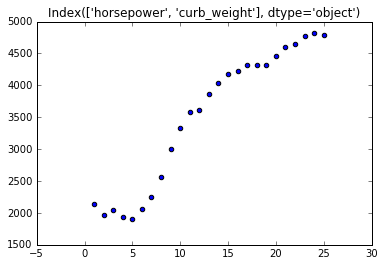

{1: 2133.040519339203,
 2: 1970.9343988986302,
 3: 2044.7406026865929,
 4: 1929.5688413970818,
 5: 1906.4060507867125,
 6: 2062.1503429762429,
 7: 2251.8265962183559,
 8: 2558.282560764992,
 9: 3007.4860659364463,
 10: 3330.772227277032,
 11: 3586.8039613042729,
 12: 3621.1238256350766,
 13: 3864.2387112358051,
 14: 4042.6512126947619,
 15: 4171.0368061812305,
 16: 4218.3600648276506,
 17: 4326.6376379307303,
 18: 4315.0759958136614,
 19: 4316.4409573077401,
 20: 4460.4815945142063,
 21: 4601.33110274316,
 22: 4654.2986675626262,
 23: 4772.2897850707477,
 24: 4816.2776461528201,
 25: 4786.9998665831044}

In [151]:
knn_train_test(univariate_model_test.index[:2], ['price'], cars)

### Model using 3 features 
* best k value = 3 (rmse 2023)

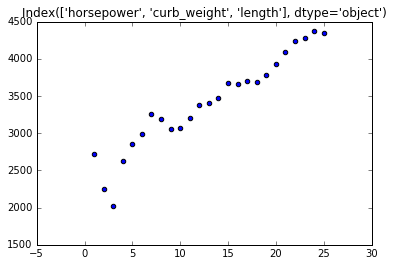

{1: 2726.1208354590244,
 2: 2250.1605498275007,
 3: 2023.2562235247776,
 4: 2627.7225342988372,
 5: 2857.0399420512463,
 6: 2987.798639741342,
 7: 3261.8631226797597,
 8: 3197.0668433802985,
 9: 3053.8322081919805,
 10: 3069.0906732249191,
 11: 3200.4895142239134,
 12: 3373.2473823375435,
 13: 3406.6290228375651,
 14: 3475.1147639948363,
 15: 3679.142138335249,
 16: 3661.7336731804471,
 17: 3695.5754115797176,
 18: 3689.290687761888,
 19: 3787.5800706324767,
 20: 3926.7637742863544,
 21: 4093.0109170813294,
 22: 4236.7960965817356,
 23: 4276.9804429871829,
 24: 4367.5832901951999,
 25: 4350.3488753191377}

In [152]:
knn_train_test(univariate_model_test.index[:3], ['price'], cars)

### Model using 4 features 
* best k value = 2 (rmse 1778)

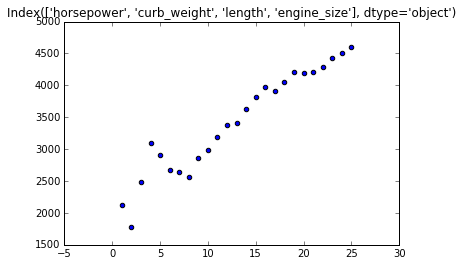

{1: 2128.2318616971361,
 2: 1778.0667303616722,
 3: 2480.5566739541373,
 4: 3100.5084226891991,
 5: 2914.4957309480287,
 6: 2679.691891542363,
 7: 2648.3418875134694,
 8: 2555.5664097908298,
 9: 2860.5404627407515,
 10: 2990.4604787955473,
 11: 3194.1948766282248,
 12: 3377.5537929600209,
 13: 3414.2106641629925,
 14: 3630.4749711346294,
 15: 3811.636464452356,
 16: 3978.0644808221587,
 17: 3907.3681828053195,
 18: 4056.8665274212549,
 19: 4203.2346262972278,
 20: 4193.0211555858477,
 21: 4216.3027989470856,
 22: 4294.1958172220084,
 23: 4430.805685187941,
 24: 4511.2639621793733,
 25: 4595.0865535472212}

In [153]:
knn_train_test(univariate_model_test.index[:4], ['price'], cars)

### Model using 5 features 
* best k value = 2 (rmse 1680)

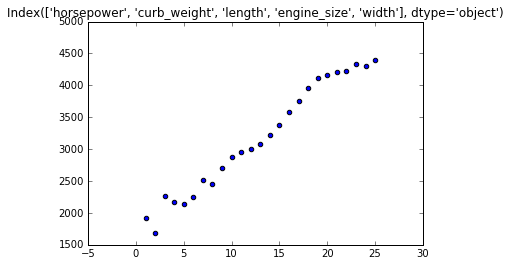

{1: 1926.3966980077696,
 2: 1680.2271494680485,
 3: 2258.3769842908432,
 4: 2169.0685699879396,
 5: 2138.8205766374181,
 6: 2247.6953423121768,
 7: 2518.0670606757576,
 8: 2449.5361772447764,
 9: 2708.287529879949,
 10: 2874.2442842796581,
 11: 2958.1701810662526,
 12: 2998.8440205061347,
 13: 3074.3749231241504,
 14: 3225.001971206485,
 15: 3376.6865679853527,
 16: 3582.3832631274968,
 17: 3748.6282972210838,
 18: 3961.5006344872531,
 19: 4118.8490216673154,
 20: 4161.9636044065501,
 21: 4212.759277768705,
 22: 4229.98912718879,
 23: 4327.3374587246508,
 24: 4300.8111252206172,
 25: 4398.5773127401517}

In [154]:
knn_train_test(univariate_model_test.index[:5], ['price'], cars)

## Next Steps

In [168]:
def knn_train_test(train_col, target_col, df, k_vals, num_folds):
    
    nums_folds = []
    ks_vals = []
    avg_rmses = []
    std_rmses = []
    
    for fold in num_folds:
    
        kf = KFold(n_splits=fold, shuffle=True, random_state=1)
        
        for k in k_vals:
            model = KNeighborsRegressor(n_neighbors=k)
            mses = cross_val_score(model,
                                  df[train_col],
                                  df[target_col],
                                  scoring='neg_mean_squared_error')
            
            rmses = np.sqrt(np.absolute(mses))
            avg_rmse = np.mean(rmses)
            std_rmse = np.std(rmses)
            
            nums_folds.append(fold)
            ks_vals.append(k)
            avg_rmses.append(avg_rmse)
            std_rmses.append(std_rmse)
            
    result_df = pd.DataFrame(columns=['fold', 'k', 'avg_rmse', 'std_rmse'])
    result_df['fold'] = nums_folds
    result_df['k'] = ks_vals
    result_df['avg_rmse'] = avg_rmses
    result_df['std_rmse'] = std_rmses

    return result_df



### Grid Search
* Variate n_neighbors parameter in KNeighborRegressor() model
* K-Fold Cross validation using 2/3/4/5 features

In [169]:
knn_train_test(univariate_model_test.index[:2], ['price'],
              cars, range(1, 21), [5, 10]).sort_values(by='avg_rmse')[:10]

,fold,k,avg_rmse,std_rmse
4,5,5,3659.608660,841.914974
24,10,5,3659.608660,841.914974
25,10,6,3749.416531,855.924564
5,5,6,3749.416531,855.924564
0,5,1,3787.998204,264.370371
20,10,1,3787.998204,264.370371
6,5,7,3842.929998,1005.220883
26,10,7,3842.929998,1005.220883
3,5,4,3891.485523,897.190272
23,10,4,3891.485523,897.190272


In [170]:
knn_train_test(univariate_model_test.index[:3], ['price'],
              cars, range(1, 21), [5, 10]).sort_values(by='avg_rmse')[:10]

,fold,k,avg_rmse,std_rmse
5,5,6,4044.825028,1182.152670
25,10,6,4044.825028,1182.152670
26,10,7,4051.437676,1369.221211
6,5,7,4051.437676,1369.221211
24,10,5,4058.088021,1011.900866
4,5,5,4058.088021,1011.900866
27,10,8,4113.230111,1407.490635
7,5,8,4113.230111,1407.490635
8,5,9,4187.734453,1465.366445
28,10,9,4187.734453,1465.366445


In [171]:
knn_train_test(univariate_model_test.index[:4], ['price'],
              cars, range(1, 21), [5, 10]).sort_values(by='avg_rmse')[:10]

,fold,k,avg_rmse,std_rmse
27,10,8,4026.795947,1272.615420
7,5,8,4026.795947,1272.615420
24,10,5,4093.002616,1129.235648
4,5,5,4093.002616,1129.235648
25,10,6,4094.720910,1186.585352
5,5,6,4094.720910,1186.585352
28,10,9,4095.231273,1297.128978
8,5,9,4095.231273,1297.128978
26,10,7,4118.039240,1355.729741
6,5,7,4118.039240,1355.729741


In [172]:
knn_train_test(univariate_model_test.index[:5], ['price'],
              cars, range(1, 21), [5, 10]).sort_values(by='avg_rmse')[:10]

,fold,k,avg_rmse,std_rmse
8,5,9,4059.441505,1411.295385
28,10,9,4059.441505,1411.295385
23,10,4,4073.743202,1121.952003
3,5,4,4073.743202,1121.952003
4,5,5,4080.269866,1116.616984
24,10,5,4080.269866,1116.616984
27,10,8,4085.578538,1349.207479
7,5,8,4085.578538,1349.207479
29,10,10,4129.847370,1476.060360
9,5,10,4129.847370,1476.060360
